In [ ]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

### Parameters

In [3]:
var_to_plot = 'UVEL'

## Import cropped netcdf MITgcm results

In [4]:
xr_mitgcm = xr.open_dataset(r"D:\geneva_200m_dalton\cropped_results_nc\lexplore_depth_time_cdalton063.nc")
xr_mitgcm["magn_vel"] = (("time", "Z"), np.sqrt(xr_mitgcm.UVEL.values**2 + xr_mitgcm.VVEL.values**2))

In [5]:
start_date = pd.to_datetime(xr_mitgcm['time'].values[0]).to_pydatetime()  #datetime(2024, 1, 1, 0, 0, 0)
end_date = pd.to_datetime(xr_mitgcm['time'].values[-1]).to_pydatetime() #datetime(2025, 1, 1, 0, 0, 0)

## Import adcp measures

In [6]:
adcp_meas = xr.open_dataset(f'../../data/datalakes/adcp_near_surface_velocity/2024.nc')
adcp_meas["magn_vel"] = (("depth", "time"), np.sqrt(adcp_meas.u.values**2 + adcp_meas.v.values**2))

In [7]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
adcp_meas.u.plot(ax=axes[0])
adcp_meas.v.plot(ax=axes[1])

## Wind velocity

In [8]:
wind = xr.open_dataset(r'../../data/meteo/geneva/Lexplore_2024.nc')

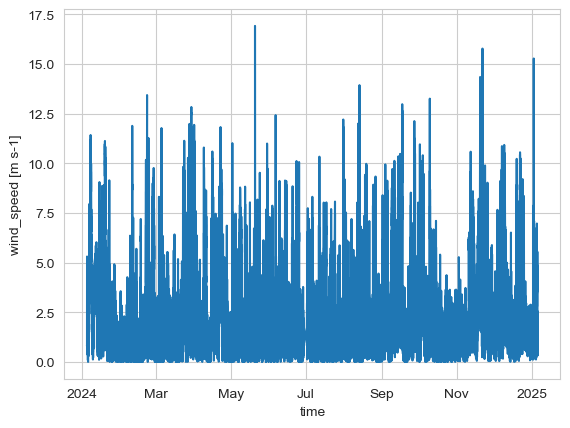

In [11]:
%matplotlib inline
plt.close('all')
wind.WS.plot()
plt.show()

## Plot velocity magnitude

In [12]:
%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
adcp_meas.magn_vel.sel(time=slice(start_date, end_date)).plot(ax=axes[0], vmax=0.9)
xr_mitgcm.magn_vel.sel(Z=range(0,-7, -1), method='nearest').plot(ax=axes[1], x='time', vmax=0.9)

In [14]:
%matplotlib notebook
fig, ax1 = plt.subplots(figsize=(10, 7))

z=-3
xr_mitgcm.magn_vel.sel(Z=z, method='nearest').plot(label=f'Mitgcm, {z}m', ax=ax1)
adcp_meas.magn_vel.sel(depth=z, method='nearest').plot(label=f'ADCP, {z}m', ax=ax1)

ax2 = ax1.twinx()  # Create a twin axis
wind.WS.plot(label='Wind speed', ax=ax2, color='grey')

# Labels
ax1.set_ylabel("Current velocity (m/s)")  # Adjust label as needed
ax2.set_ylabel("Wind Magnitude (m/s)")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

<IPython.core.display.Javascript object>

C:\Users\leroquan\AppData\Local\Temp\ipykernel_23268\643342113.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
